In [1]:
import os
import numpy as np 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
X = []

for i in range(0, 120):
    for j in range(0, 120):
        X.append((0.05*i-3, 0.05*j-3)) 
        
X = np.array(X)

Y = [
    1 if math.fabs(x)**0.6666 + math.fabs(y)**0.6666 <= 2 else 0
    for [x, y] in X
]

In [3]:
l0 = Input(shape=(2,))
l1 = Dense(6, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(6, activation='sigmoid', use_bias=True)(l1) 
l3 = Dense(1, activation='sigmoid', use_bias=False)(l2)

model = Model(input=l0, output=l3)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


c:\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [7]:
if os.path.isfile("learn_matrix_2.1"):
    model.load_weights("learn_matrix_2.1")
else:
    model.fit(
        X, Y,
        epochs=2000,
        verbose=False
    )
    model.save("learn_matrix_2.1")

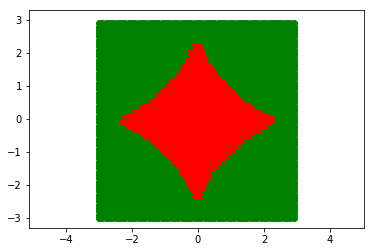

In [8]:
%matplotlib inline



plt.axis('equal')

c = np.r_[-3:3:0.1]

XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green')

plt.show()


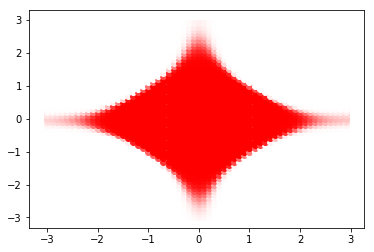

In [9]:
def saturate(v):
    return min(1, max(0, v))

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()